In [31]:
#2017年の中学生のデータを取り込み
import pandas as pd
df = pd.read_csv('pref_2017.csv')
df.head()

,2017,f_rate,gaku,life,sports,morals,jison
0,Hokkaido,3.39,65.0,5.10,40.70,4.9,5.1
1,Aomori,2.99,66.3,5.25,42.28,5.3,5.4
2,Iwate,2.56,63.8,5.20,44.22,5.5,5.1
3,Miyagi,4.34,65.0,5.35,42.01,4.8,5.0
4,Akita,2.45,70.0,6.15,44.22,5.9,5.9


In [35]:
#都道府県列を削除
df_1 = df.drop(['2017'], axis = 1)
df_1.head()

,f_rate,gaku,life,sports,morals,jison
0,3.39,65.0,5.10,40.70,4.9,5.1
1,2.99,66.3,5.25,42.28,5.3,5.4
2,2.56,63.8,5.20,44.22,5.5,5.1
3,4.34,65.0,5.35,42.01,4.8,5.0
4,2.45,70.0,6.15,44.22,5.9,5.9


In [37]:
#データの標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(df_1)

In [38]:
#不登校率との相関係数
sc_df = pd.DataFrame(sc_df, columns = df_1.columns)
corr = sc_df.corr()['f_rate']
corr

f_rate    1.000000
gaku     -0.296378
life     -0.219210
sports   -0.336580
morals   -0.311402
jison    -0.234463
Name: f_rate, dtype: float64

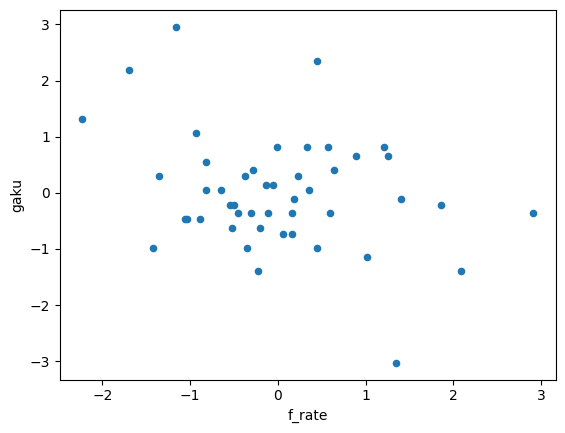

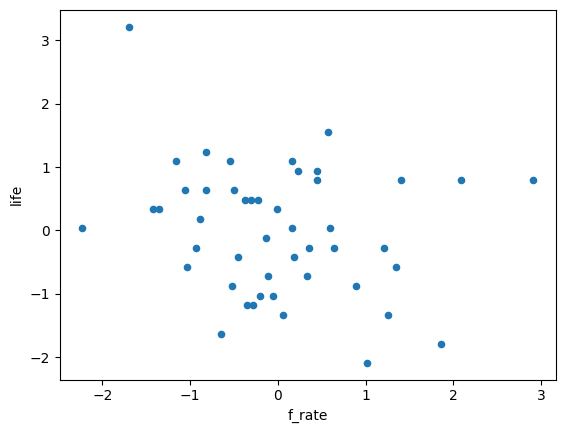

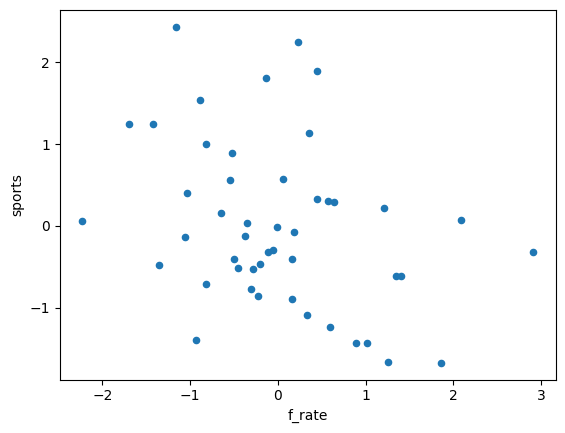

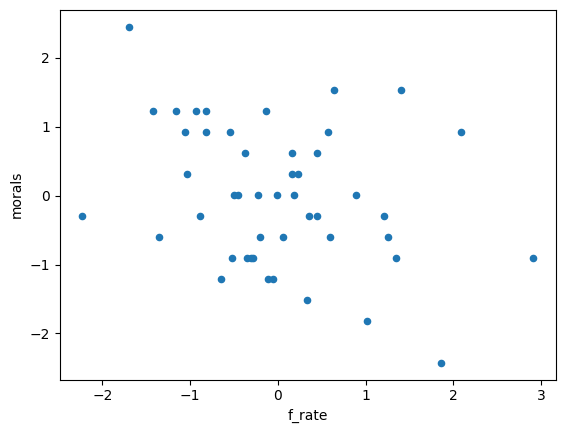

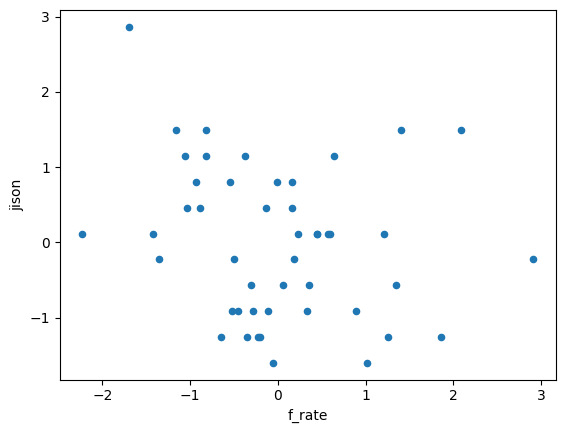

In [39]:
#散布図で相関を見てみる
for i in sc_df.columns:
    if i == 'f_rate':
        continue
    sc_df.plot(kind = 'scatter', x = 'f_rate', y = i)

In [40]:
#t-SNEを実行するため相関係数の低かった'life', 'jison'と不登校率を削除
df_2 = sc_df.drop(['life', 'jison','f_rate'], axis = 1)
df_2.head()

,gaku,sports,morals
0,-0.367854,-1.243218,-0.596623
1,0.297113,-0.122949,0.622563
2,-0.981668,1.252571,1.232157
3,-0.367854,-0.314387,-0.901420
4,2.189708,1.252571,2.451343


In [41]:
#tsneの実行
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0).fit_transform(df_2)
tsne.shape

(47, 2)

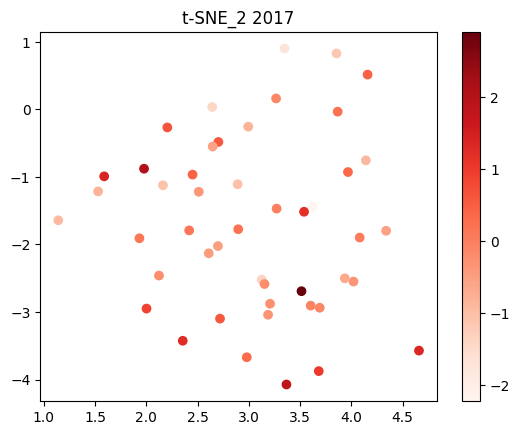

In [42]:
#t-SNEの結果を表示
import matplotlib.pyplot as plt
plt.scatter(tsne[:,0], tsne[:,1],cmap='Reds',c=sc_df['f_rate'])
plt.title('t-SNE_2 2017')
plt.colorbar()
plt.show()

In [43]:
#gaku、sports、moralsの3つをPCAで次元削減してt-SNEを実行してみる
#PCAで累積寄与率が90%になるように次元圧縮する
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.9, svd_solver = 'full' )
#新規列への学習と当てはめ
pca_df = pca.fit_transform(df_2)
pca_df.shape

(47, 3)

In [44]:
tsne_2 = TSNE(random_state=0).fit_transform(pca_df)
tsne_2.shape

(47, 2)

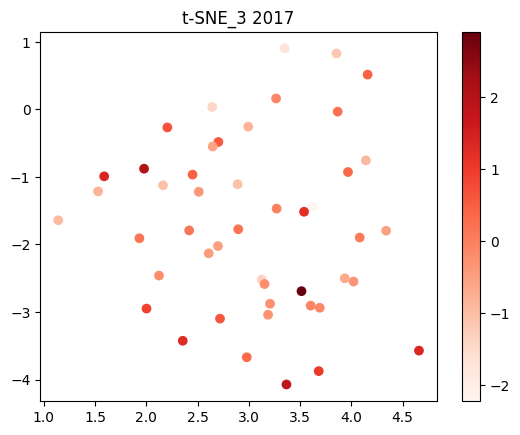

In [45]:
plt.scatter(tsne_2[:,0], tsne_2[:,1],cmap='Reds',c=sc_df['f_rate'])
plt.title('t-SNE_3 2017')
plt.colorbar()
plt.show()